In [1]:
import matplotlib.pyplot as plt
from numpy import arange
from Functions.Help import read_txt
from Functions.Methods import svd, nrmse, smape, nrmse_gradient, smape_gradient, best_gd, smape_gradient_wolfram

In [2]:
results = read_txt('LR/1.txt')
arguments = results[0]
training_size = results[1]
test_size = results[2]
training_parameters = results[3][0]
training_answers = results[3][1]
test_parameters = results[4][0]
test_answers = results[4][1]

100%|██████████| 256/256 [00:00<00:00, 9473.89it/s]


# SVD

$\theta_{\tau}^* = U \cdot (D^2 + \tau \cdot I_m)^{-1} \cdot D \cdot V^T \cdot y$

# Градиентный спуск

In [3]:
gradient_function = lambda mistake, mistake_gradient, package_size: best_gd(mistake=mistake,
                                                                            mistake_gradient=mistake_gradient,
                                                                            arguments_size=arguments,
                                                                            package_size=package_size,
                                                                            training_arguments=training_parameters,
                                                                            training_answers=training_answers,
                                                                            test_arguments=test_parameters,
                                                                            test_answers=test_answers)
gradient_function_1 = lambda mistake, mistake_gradient: gradient_function(mistake=mistake,
                                                                          mistake_gradient=mistake_gradient,
                                                                          package_size=1)
gradient_function_5 = lambda mistake, mistake_gradient: gradient_function(mistake=mistake,
                                                                          mistake_gradient=mistake_gradient,
                                                                          package_size=5)
gradient_function_10 = lambda mistake, mistake_gradient: gradient_function(mistake=mistake,
                                                                           mistake_gradient=mistake_gradient,
                                                                           package_size=10)

# Проведём обучения!

## SVD

In [4]:
svd_result = svd(arguments_training=training_parameters,
                 answers_training=training_answers,
                 arguments_test=test_parameters,
                 answers_test=test_answers)

100%|██████████| 35/35 [00:00<00:00, 119.05it/s]


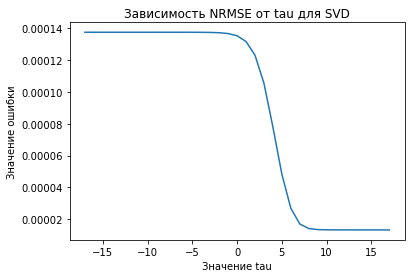

In [5]:
plt.plot(arange(start=-17, stop=18), svd_result['NRMSE Mistake'].to_numpy())
plt.xlabel('Значение tau')
plt.ylabel('Значение ошибки')
plt.title('Зависимость NRMSE от tau для SVD')
plt.show()

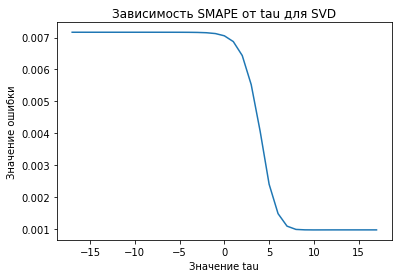

In [6]:
plt.plot(arange(start=-17, stop=18), svd_result['SMAPE Mistake'].to_numpy())
plt.xlabel('Значение tau')
plt.ylabel('Значение ошибки')
plt.title('Зависимость SMAPE от tau для SVD')
plt.show()

## Градиентный NRMSE

### Пакет размером 1

In [7]:
nrmse_gradient_decent_1 = gradient_function_1(mistake=nrmse,
                                              mistake_gradient=nrmse_gradient)

9720it [06:14, 25.98it/s] 


In [8]:
nrmse_gradient_decent_1_q = nrmse_gradient_decent_1[nrmse_gradient_decent_1['Final Q'] ==
                                                    nrmse_gradient_decent_1['Final Q'].min()]
nrmse_gradient_decent_1_nrmse = nrmse_gradient_decent_1[nrmse_gradient_decent_1['NRMSE Mistake'] ==
                                                    nrmse_gradient_decent_1['NRMSE Mistake'].min()]
nrmse_gradient_decent_1_smape = nrmse_gradient_decent_1[nrmse_gradient_decent_1['SMAPE Mistake'] ==
                                                    nrmse_gradient_decent_1['SMAPE Mistake'].min()]

### Пакет размером 5

In [9]:
nrmse_gradient_decent_5 = gradient_function_5(mistake=nrmse,
                                              mistake_gradient=nrmse_gradient)

9720it [06:40, 24.26it/s]


In [10]:
nrmse_gradient_decent_5_q = nrmse_gradient_decent_5[nrmse_gradient_decent_5['Final Q'] ==
                                                    nrmse_gradient_decent_5['Final Q'].min()]
nrmse_gradient_decent_5_nrmse = nrmse_gradient_decent_5[nrmse_gradient_decent_5['NRMSE Mistake'] ==
                                                    nrmse_gradient_decent_5['NRMSE Mistake'].min()]
nrmse_gradient_decent_5_smape = nrmse_gradient_decent_5[nrmse_gradient_decent_5['SMAPE Mistake'] ==
                                                    nrmse_gradient_decent_5['SMAPE Mistake'].min()]

### Пакет размером 10

In [11]:
nrmse_gradient_decent_10 = gradient_function_10(mistake=nrmse,
                                              mistake_gradient=nrmse_gradient)

9720it [07:20, 22.07it/s]


In [12]:
nrmse_gradient_decent_10_q = nrmse_gradient_decent_10[nrmse_gradient_decent_10['Final Q'] ==
                                                    nrmse_gradient_decent_10['Final Q'].min()]
nrmse_gradient_decent_10_nrmse = nrmse_gradient_decent_10[nrmse_gradient_decent_10['NRMSE Mistake'] ==
                                                    nrmse_gradient_decent_10['NRMSE Mistake'].min()]
nrmse_gradient_decent_10_smape = nrmse_gradient_decent_10[nrmse_gradient_decent_10['SMAPE Mistake'] ==
                                                    nrmse_gradient_decent_10['SMAPE Mistake'].min()]

### Графики

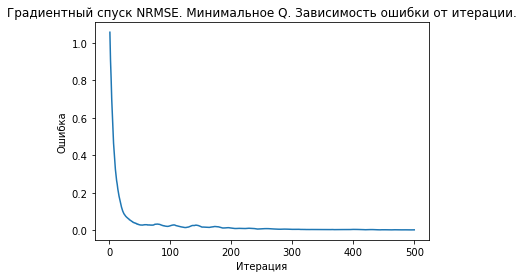

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
433,ridge,0.000002,linear,1.0,0.2,0.000045,True,0.003353,0.197335,0.002761,"[1.055550096841019, 0.907109558735946, 0.81177...","[-0.08169447757648395, -0.002258955075893246, ..."


In [79]:
mistakes = nrmse_gradient_decent_10_q['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск NRMSE. Минимальное Q. Зависимость ошибки от итерации.')
plt.show()
nrmse_gradient_decent_10_q

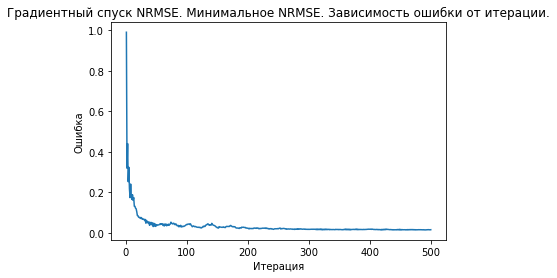

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
3717,lasso,0.000912,linear,1.0,1.0,0.000045,True,0.003296,0.193501,0.015592,"[0.9904298462886416, 0.31943594707688155, 0.44...","[-0.08598257781304006, -0.007787787716992258, ..."


In [78]:
mistakes = nrmse_gradient_decent_10_nrmse['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск NRMSE. Минимальное NRMSE. Зависимость ошибки от итерации.')
plt.show()
nrmse_gradient_decent_10_nrmse

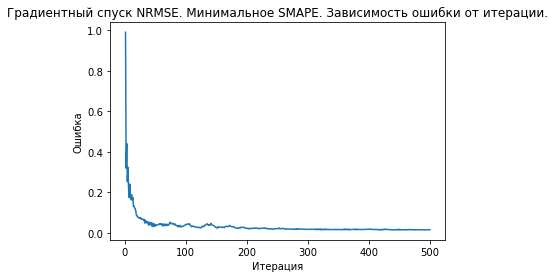

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
3717,lasso,0.000912,linear,1.0,1.0,0.000045,True,0.003296,0.193501,0.015592,"[0.9904298462886416, 0.31943594707688155, 0.44...","[-0.08598257781304006, -0.007787787716992258, ..."


In [77]:
mistakes = nrmse_gradient_decent_10_smape['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск NRMSE. Минимальное SMAPE. Зависимость ошибки от итерации.')
plt.show()
nrmse_gradient_decent_10_smape

## Грандиентный SMAPE

### Пакет размера 1

In [16]:
smape_gradient_decent_1 = gradient_function_1(mistake=smape,
                                              mistake_gradient=smape_gradient)

9720it [04:24, 36.80it/s] 


In [17]:
smape_gradient_decent_1_q = smape_gradient_decent_1[smape_gradient_decent_1['Final Q'] ==
                                                    smape_gradient_decent_1['Final Q'].min()]
smape_gradient_decent_1_nrmse = smape_gradient_decent_1[smape_gradient_decent_1['NRMSE Mistake'] ==
                                                    smape_gradient_decent_1['NRMSE Mistake'].min()]
smape_gradient_decent_1_smape = smape_gradient_decent_1[smape_gradient_decent_1['SMAPE Mistake'] ==
                                                    smape_gradient_decent_1['SMAPE Mistake'].min()]

### Пакет размера 5

In [18]:
smape_gradient_decent_5 = gradient_function_5(mistake=smape,
                                              mistake_gradient=smape_gradient)

9720it [06:03, 26.71it/s]


In [19]:
smape_gradient_decent_5_q = smape_gradient_decent_5[smape_gradient_decent_5['Final Q'] ==
                                                    smape_gradient_decent_5['Final Q'].min()]
smape_gradient_decent_5_nrmse = smape_gradient_decent_5[smape_gradient_decent_5['NRMSE Mistake'] ==
                                                    smape_gradient_decent_5['NRMSE Mistake'].min()]
smape_gradient_decent_5_smape = smape_gradient_decent_5[smape_gradient_decent_5['SMAPE Mistake'] ==
                                                    smape_gradient_decent_5['SMAPE Mistake'].min()]

### Пакет размера 10

In [20]:
smape_gradient_decent_10 = gradient_function_10(mistake=smape,
                                              mistake_gradient=smape_gradient)

9720it [08:20, 19.42it/s]


In [21]:
smape_gradient_decent_10_q = smape_gradient_decent_10[smape_gradient_decent_10['Final Q'] ==
                                                    smape_gradient_decent_10['Final Q'].min()]
smape_gradient_decent_10_nrmse = smape_gradient_decent_10[smape_gradient_decent_10['NRMSE Mistake'] ==
                                                    smape_gradient_decent_10['NRMSE Mistake'].min()]
smape_gradient_decent_10_smape = smape_gradient_decent_10[smape_gradient_decent_10['SMAPE Mistake'] ==
                                                    smape_gradient_decent_10['SMAPE Mistake'].min()]

### Графики

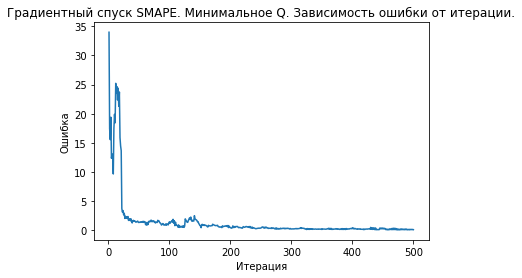

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
477,ridge,0.000912,linear,1.0,1.0,0.000045,True,0.002228,0.152681,0.117246,"[33.964808844116575, 17.43032860603177, 15.555...","[-0.08084027091833035, -0.002696029886287339, ..."


In [76]:
mistakes = smape_gradient_decent_10_q['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск SMAPE. Минимальное Q. Зависимость ошибки от итерации.')
plt.show()
smape_gradient_decent_10_q

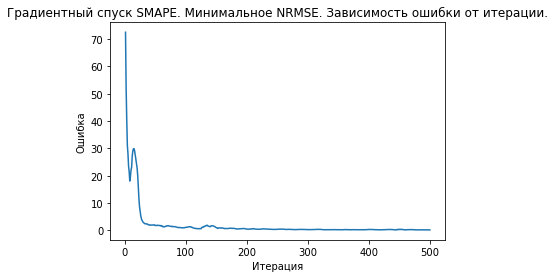

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
435,ridge,0.000002,linear,1.0,0.4,0.000045,True,0.001844,0.102551,0.122342,"[72.47829707089507, 52.11587575558641, 40.4594...","[-0.08080297271298, -0.00255291278676432, -0.0..."


In [75]:
mistakes = smape_gradient_decent_10_nrmse['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск SMAPE. Минимальное NRMSE. Зависимость ошибки от итерации.')
plt.show()
smape_gradient_decent_10_nrmse

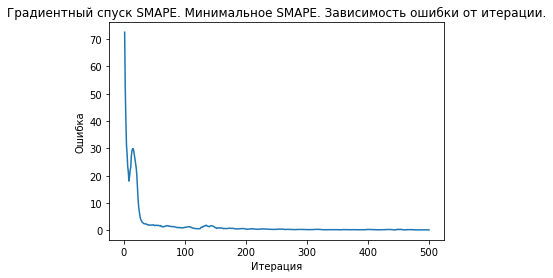

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
435,ridge,0.000002,linear,1.0,0.4,0.000045,True,0.001844,0.102551,0.122342,"[72.47829707089507, 52.11587575558641, 40.4594...","[-0.08080297271298, -0.00255291278676432, -0.0..."


In [74]:
mistakes = smape_gradient_decent_10_smape['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск SMAPE. Минимальное SMAPE. Зависимость ошибки от итерации.')
plt.show()
smape_gradient_decent_10_smape

## Градиентный SMAPE с Wolfram

### Пакет размера 1

In [25]:
smape_wolfram_gradient_decent_1 = gradient_function_1(mistake=smape,
                                              mistake_gradient=smape_gradient_wolfram)

9720it [04:27, 36.33it/s] 


In [26]:
smape_wolfram_gradient_decent_1_q = smape_wolfram_gradient_decent_1[smape_wolfram_gradient_decent_1['Final Q'] ==
                                                    smape_wolfram_gradient_decent_1['Final Q'].min()]
smape_wolfram_gradient_decent_1_nrmse = smape_wolfram_gradient_decent_1[smape_wolfram_gradient_decent_1['NRMSE Mistake'] ==
                                                    smape_wolfram_gradient_decent_1['NRMSE Mistake'].min()]
smape_wolfram_gradient_decent_1_smape = smape_wolfram_gradient_decent_1[smape_wolfram_gradient_decent_1['SMAPE Mistake'] ==
                                                    smape_wolfram_gradient_decent_1['SMAPE Mistake'].min()]

### Пакет размера 5

In [27]:
smape_wolfram_gradient_decent_5 = gradient_function_5(mistake=smape,
                                              mistake_gradient=smape_gradient_wolfram)

9720it [06:23, 25.33it/s]


In [28]:
smape_wolfram_gradient_decent_5_q = smape_wolfram_gradient_decent_5[smape_wolfram_gradient_decent_5['Final Q'] ==
                                                    smape_wolfram_gradient_decent_5['Final Q'].min()]
smape_wolfram_gradient_decent_5_nrmse = smape_wolfram_gradient_decent_5[smape_wolfram_gradient_decent_5['NRMSE Mistake'] ==
                                                    smape_wolfram_gradient_decent_5['NRMSE Mistake'].min()]
smape_wolfram_gradient_decent_5_smape = smape_wolfram_gradient_decent_5[smape_wolfram_gradient_decent_5['SMAPE Mistake'] ==
                                                    smape_wolfram_gradient_decent_5['SMAPE Mistake'].min()]

### Пакет размера 10

In [29]:
smape_wolfram_gradient_decent_10 = gradient_function_10(mistake=smape,
                                              mistake_gradient=smape_gradient_wolfram)

9720it [10:20, 15.67it/s]


In [30]:
smape_wolfram_gradient_decent_10_q = smape_wolfram_gradient_decent_10[smape_wolfram_gradient_decent_10['Final Q'] ==
                                                    smape_wolfram_gradient_decent_10['Final Q'].min()]
smape_wolfram_gradient_decent_10_nrmse = smape_wolfram_gradient_decent_10[smape_wolfram_gradient_decent_10['NRMSE Mistake'] ==
                                                    smape_wolfram_gradient_decent_10['NRMSE Mistake'].min()]
smape_wolfram_gradient_decent_10_smape = smape_wolfram_gradient_decent_10[smape_wolfram_gradient_decent_10['SMAPE Mistake'] ==
                                                    smape_wolfram_gradient_decent_10['SMAPE Mistake'].min()]

### Графики

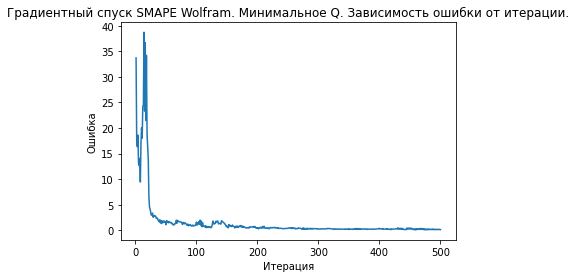

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
477,ridge,0.000912,linear,1.0,1.0,0.000045,True,0.001998,0.124899,0.104507,"[33.713968992376984, 17.827090788498197, 16.34...","[-0.08011634824738192, -0.0024418402831237985,..."


In [73]:
mistakes = smape_wolfram_gradient_decent_10_q['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск SMAPE Wolfram. Минимальное Q. Зависимость ошибки от итерации.')
plt.show()
smape_wolfram_gradient_decent_10_q

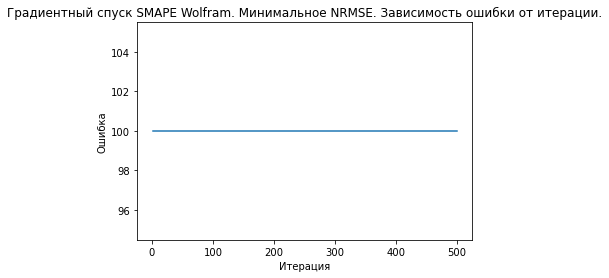

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
468,ridge,0.000912,linear,1.0,0.0,0.000045,False,0.001901,0.115488,99.991467,"[99.99146684264649, 99.99146684264649, 99.9914...","[-0.06094353992011724, 0.057344472000729396, -..."


In [72]:
mistakes = smape_wolfram_gradient_decent_10_nrmse['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск SMAPE Wolfram. Минимальное NRMSE. Зависимость ошибки от итерации.')
plt.show()
smape_wolfram_gradient_decent_10_nrmse

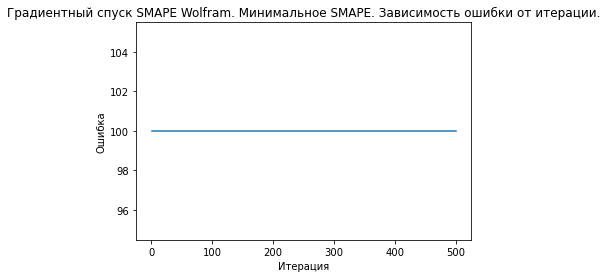

,Regularisation,Tau,Step strategy,Mu,Alpha,Epsilon,Change if bigger,NRMSE Mistake,SMAPE Mistake,Final Q,Mistakes,Result
468,ridge,0.000912,linear,1.0,0.0,0.000045,False,0.001901,0.115488,99.991467,"[99.99146684264649, 99.99146684264649, 99.9914...","[-0.06094353992011724, 0.057344472000729396, -..."


In [71]:
mistakes = smape_wolfram_gradient_decent_10_smape['Mistakes'].to_numpy()[0]
plt.plot(arange(1, mistakes.size + 1), mistakes)
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск SMAPE Wolfram. Минимальное SMAPE. Зависимость ошибки от итерации.')
plt.show()
smape_wolfram_gradient_decent_10_smape

# Ошибки

## SVD

In [60]:
print(f"Минимальный NRMSE полученный SVD:{svd_result[svd_result['NRMSE Mistake'] == svd_result['NRMSE Mistake'].min()]['NRMSE Mistake'].to_numpy()[0]}")
print(f"Минимальный SMAPe полученный SVD:{svd_result[svd_result['SMAPE Mistake'] == svd_result['SMAPE Mistake'].min()]['SMAPE Mistake'].to_numpy()[0]}")


Минимальный NRMSE полученный SVD:1.331355893403747e-05
Минимальный SMAPe полученный SVD:0.000980887067060312


## Градиент NRMSE

### Пакет размера 1

In [62]:
print(f"NRMSE для минимального Q:{nrmse_gradient_decent_1_q['NRMSE Mistake'].to_numpy()[0]}")
print(f'SMAPE для минимального Q:{nrmse_gradient_decent_1_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{nrmse_gradient_decent_1_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{nrmse_gradient_decent_1_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{nrmse_gradient_decent_1_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{nrmse_gradient_decent_1_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.013551866122090195
SMAPE для минимального Q:0.7059594662333453
NRMSE для минимального NRMSE:0.013281718117171059
SMAPE для минимального NRMSE:0.6908770050135128
NRMSE для минимального SMAPE:0.013319322128147513
SMAPE для минимального SMAPE:0.6675464318897013


### Пакет размера 5

In [63]:
print(f'NRMSE для минимального Q:{nrmse_gradient_decent_5_q["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального Q:{nrmse_gradient_decent_5_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{nrmse_gradient_decent_5_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{nrmse_gradient_decent_5_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{nrmse_gradient_decent_5_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{nrmse_gradient_decent_5_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.003344841360532797
SMAPE для минимального Q:0.17350026793166137
NRMSE для минимального NRMSE:0.0022365523440828275
SMAPE для минимального NRMSE:0.18153785908796216
NRMSE для минимального SMAPE:0.0027687452296591454
SMAPE для минимального SMAPE:0.14566049101240566


### Пакет размера 10

In [64]:
print(f'NRMSE для минимального Q:{nrmse_gradient_decent_10_q["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального Q:{nrmse_gradient_decent_10_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{nrmse_gradient_decent_10_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{nrmse_gradient_decent_10_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{nrmse_gradient_decent_10_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{nrmse_gradient_decent_10_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.003353174074941035
SMAPE для минимального Q:0.19733462822389813
NRMSE для минимального NRMSE:0.003295910354405868
SMAPE для минимального NRMSE:0.19350072800858195
NRMSE для минимального SMAPE:0.003295910354405868
SMAPE для минимального SMAPE:0.19350072800858195


## Градиент SMAPE

### Пакет размера 1

In [65]:
print(f'NRMSE для минимального Q:{smape_gradient_decent_1_q["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального Q:{smape_gradient_decent_1_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{smape_gradient_decent_1_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{smape_gradient_decent_1_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{smape_gradient_decent_1_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{smape_gradient_decent_1_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.033334968752991447
SMAPE для минимального Q:2.130119242656473
NRMSE для минимального NRMSE:0.01768608222247612
SMAPE для минимального NRMSE:0.9923070882351874
NRMSE для минимального SMAPE:0.01768608222247612
SMAPE для минимального SMAPE:0.9923070882351874


### Пакет размера 5

In [66]:
print(f'NRMSE для минимального Q:{smape_gradient_decent_5_q["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального Q:{smape_gradient_decent_5_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{smape_gradient_decent_5_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{smape_gradient_decent_5_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{smape_gradient_decent_5_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{smape_gradient_decent_5_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.0068761947798421375
SMAPE для минимального Q:0.38444329694797774
NRMSE для минимального NRMSE:0.005378255628146587
SMAPE для минимального NRMSE:0.5102087442796386
NRMSE для минимального SMAPE:0.0062787022793051135
SMAPE для минимального SMAPE:0.3277483538423172


### Пакет размера 10

In [67]:
print(f'NRMSE для минимального Q:{smape_gradient_decent_10_q["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального Q:{smape_gradient_decent_10_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{smape_gradient_decent_10_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{smape_gradient_decent_10_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{smape_gradient_decent_10_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{smape_gradient_decent_10_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.002227521165746882
SMAPE для минимального Q:0.15268111445980548
NRMSE для минимального NRMSE:0.0018440361862262942
SMAPE для минимального NRMSE:0.10255128201538727
NRMSE для минимального SMAPE:0.0018440361862262942
SMAPE для минимального SMAPE:0.10255128201538727


## Градиентный SMAPE Wolfram

### Пакет размера 1

In [68]:
print(f'NRMSE для минимального Q:{smape_wolfram_gradient_decent_1_q["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального Q:{smape_wolfram_gradient_decent_1_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{smape_wolfram_gradient_decent_1_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{smape_wolfram_gradient_decent_1_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{smape_wolfram_gradient_decent_1_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{smape_wolfram_gradient_decent_1_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.3518770008160405
SMAPE для минимального Q:15.721294721335251
NRMSE для минимального NRMSE:0.01545740843257935
SMAPE для минимального NRMSE:1.223845198967539
NRMSE для минимального SMAPE:0.017941624507915456
SMAPE для минимального SMAPE:0.9708435614148596


### Пакет размера 5

In [69]:
print(f'NRMSE для минимального Q:{smape_wolfram_gradient_decent_5_q["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального Q:{smape_wolfram_gradient_decent_5_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{smape_wolfram_gradient_decent_5_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{smape_wolfram_gradient_decent_5_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{smape_wolfram_gradient_decent_5_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{smape_wolfram_gradient_decent_5_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.004299341600719046
SMAPE для минимального Q:0.26371859090784944
NRMSE для минимального NRMSE:0.002417029192807919
SMAPE для минимального NRMSE:0.14595512453839501
NRMSE для минимального SMAPE:0.002417029192807919
SMAPE для минимального SMAPE:0.14595512453839501


### Пакет размера 10

In [70]:
print(f'NRMSE для минимального Q:{smape_wolfram_gradient_decent_10_q["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального Q:{smape_wolfram_gradient_decent_10_q["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального NRMSE:{smape_wolfram_gradient_decent_10_nrmse["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального NRMSE:{smape_wolfram_gradient_decent_10_nrmse["SMAPE Mistake"].to_numpy()[0]}')
print(f'NRMSE для минимального SMAPE:{smape_wolfram_gradient_decent_10_smape["NRMSE Mistake"].to_numpy()[0]}')
print(f'SMAPE для минимального SMAPE:{smape_wolfram_gradient_decent_10_smape["SMAPE Mistake"].to_numpy()[0]}')

NRMSE для минимального Q:0.001998282215434259
SMAPE для минимального Q:0.12489929527094157
NRMSE для минимального NRMSE:0.0019008858632428725
SMAPE для минимального NRMSE:0.11548805479055044
NRMSE для минимального SMAPE:0.0019008858632428725
SMAPE для минимального SMAPE:0.11548805479055044
